# Business Analytics Practicum: Assignment 1
## Tsopelakou Aglaia
## BAFT 1716


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import re
import statistics
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import json
import os

Question 1 (20 points):

A. Write a function called is_palindrome() that takes in a single string
argument and returns True or False depending on whether the string is a
palindrome




In [11]:

def is_palindrome(num):
    if num[::-1] == num:
       return True
    else:
       return False


my_string = 'Hello'
is_palindrome(my_string)


False

In [12]:
my_string2 = 'anna'
is_palindrome(my_string2)

True


B. Write a function that takes two lists of equal length and creates a set of all
possible tuples where the first element is from the first list and the second
element is from the second list

In [13]:
def tuples(group1,group2):
 return list(zip(group1, group2))


In [14]:
group1 = ['a', 'b']
group2 = ['c', 'd']

group3 = ['a', 'b','e']
group4 = ['c', 'd','f']
tuples(group1,group2)

[('a', 'c'), ('b', 'd')]

In [15]:
tuples(group3,group4)

[('a', 'c'), ('b', 'd'), ('e', 'f')]


C. Write a function that takes in a set of strings and computes the powerset,
i.e. the set of all possible subsets

In [16]:
def powerset(s):
    lst = []
    for i in range(0,len(s)+1):
        subset = (set(itertools.combinations(s, i)))
        lst.append(subset)
    return lst

In [17]:
x={'x','c','v','x','w','g'}
powerset(x)

[{()},
 {('c',), ('g',), ('v',), ('w',), ('x',)},
 {('g', 'c'),
  ('v', 'c'),
  ('v', 'g'),
  ('w', 'c'),
  ('w', 'g'),
  ('w', 'v'),
  ('w', 'x'),
  ('x', 'c'),
  ('x', 'g'),
  ('x', 'v')},
 {('v', 'g', 'c'),
  ('w', 'g', 'c'),
  ('w', 'v', 'c'),
  ('w', 'v', 'g'),
  ('w', 'x', 'c'),
  ('w', 'x', 'g'),
  ('w', 'x', 'v'),
  ('x', 'g', 'c'),
  ('x', 'v', 'c'),
  ('x', 'v', 'g')},
 {('w', 'v', 'g', 'c'),
  ('w', 'x', 'g', 'c'),
  ('w', 'x', 'v', 'c'),
  ('w', 'x', 'v', 'g'),
  ('x', 'v', 'g', 'c')},
 {('w', 'x', 'v', 'g', 'c')}]


D. Write a function that takes in a dictionary whose keys are strings and a
regular expression and returns a list of keys from the dictionary that
match that regular expression

In [4]:
def printkeys(string, regex):
    lst = []
    for key in dict:
      if regex.match(key):
          lst.append(key)
    return lst



In [9]:
dict={'abcd':None,'efgh':None,'123':None, 'lila1':None, 'tsopelakou2':None}
regex = re.compile('^(?=.*[a-zA-Z])(?=.*[0-9])')

printkeys(dict, regex)

['lila1', 'tsopelakou2']

Question 2 (28 points):

Load the summary file into a Pandas data frame, calling it sumdf

In [20]:
os.getcwd()

'C:\\Users\\tsope'

In [21]:
path="/Users/tsope/Desktop"
os.chdir(path)

In [22]:
data_filename = 'gombe_128.csv'
sumdf=pd.read_csv(data_filename,sep=",",encoding="utf-8")
sumdf = pd.DataFrame(sumdf)

In [23]:
sumdf.head(10)

,chimpcode,sex,kasekela,dom,sol,impl,symp,stbl,invt,depd,...,pred,conv,cool,innov,dominance,extraversion,conscientiousness,agreeableness,neuroticism,openness
0,E131,0,0.142857,2.428571,3.857143,3.000000,5.571429,4.285714,4.142857,4.285714,...,3.428571,4.285714,5.285714,4.000000,3.571429,4.642857,4.809524,5.047619,3.714286,3.642857
1,P70,1,1.000000,4.666667,3.333333,4.333333,4.666667,4.000000,2.666667,4.666667,...,5.333333,5.333333,3.666667,4.333333,4.888889,4.333333,4.222222,5.666667,4.000000,3.500000
2,G74,1,0.000000,3.333333,3.166667,3.500000,5.500000,5.166667,4.166667,5.666667,...,3.166667,3.333333,4.833333,4.666667,3.500000,4.750000,4.222222,5.222222,3.250000,3.875000
3,A364,0,0.000000,1.666667,1.333333,2.000000,2.666667,4.666667,3.333333,2.666667,...,4.000000,3.000000,4.333333,4.666667,3.777778,5.166667,5.222222,3.666667,3.333333,3.750000
4,B89,0,1.000000,3.000000,4.666667,3.000000,4.333333,2.666667,3.000000,5.000000,...,3.666667,3.333333,5.333333,5.333333,3.333333,4.250000,4.555556,4.111111,4.166667,3.833333
5,G19,1,1.000000,4.000000,2.666667,2.666667,3.333333,4.000000,2.333333,5.000000,...,4.000000,3.666667,4.333333,4.000000,3.881611,5.000000,4.444444,3.666667,3.333333,3.583333
6,Z201,0,1.000000,3.000000,2.666667,1.666667,4.333333,3.333333,3.000000,3.666667,...,4.000000,2.666667,4.666667,3.666667,3.777778,5.416667,4.888889,3.777778,4.000000,3.250000
7,N319,1,1.000000,3.333333,3.666667,4.333333,4.666667,4.333333,3.666667,5.666667,...,5.666667,5.000000,4.333333,5.000000,3.555556,5.166667,4.000000,4.666667,3.333333,3.750000
8,K58,0,0.000000,3.000000,2.333333,3.833333,4.833333,2.833333,4.833333,4.000000,...,3.500000,3.166667,4.666667,5.333333,3.944444,4.833333,3.833333,4.888040,4.833333,5.041667
9,X261,0,1.000000,3.333333,6.333333,4.666667,4.333333,4.000000,4.666667,4.000000,...,4.333333,5.000000,4.666667,2.666667,4.222222,3.166667,4.333333,4.111111,3.666667,3.333333



A. What is the difference between the mean and median values of the
neuroticism score?

In [24]:
mean_neuroticism=sumdf["neuroticism"].mean()
median_neuroticism=sumdf["neuroticism"].median()
difference=mean_neuroticism-median_neuroticism

In [25]:
print("mean:",mean_neuroticism,"median:",median_neuroticism,"difference:",difference)

mean: 3.8770951710234387 median: 3.833333333 difference: 0.04376183802343858



B. How many chimpanzees have only 2 numerical digits in their code?

In [26]:
sumdf['chimpcode'][sumdf['chimpcode'].str.contains(r"^[A-Z][0-9]{2}$")].count()

21

C. Are there any chimpanzees whose code consists of letters earlier than ‘S’
in the alphabet and whose numbers are all even?

In [27]:
sumdf['chimpcode'][sumdf['chimpcode'].str.contains(r"^[A-S][02468]{0,3}$")].count()

10

D. What is the average difference in score between the conventional and
decisive traits?

In [28]:
statistics.mean(abs(sumdf['conv'] - sumdf['decs']))

1.4657922753203125

E. The final six columns (dominance to openness) correspond to the broad
categories. By creating any relevant data frame to support your answer,
which of these six broad characteristics is most prominent among female
chimpanzees in the sample, and which was most prominent among the
males

In [29]:
a = sumdf.groupby('sex', as_index=False)[['dominance','extraversion','conscientiousness','agreeableness','neuroticism','openness']].mean()
a

,sex,dominance,extraversion,conscientiousness,agreeableness,neuroticism,openness
0,0,3.804156,4.349256,4.691202,4.430595,3.580546,3.640692
1,1,4.220803,4.890041,4.161139,4.662747,4.258373,4.397894


In [30]:
# adding a new row containing the difference between the average male and female characteristics
a.loc[2] = abs(a.iloc[0]-a.iloc[1])
a

,sex,dominance,extraversion,conscientiousness,agreeableness,neuroticism,openness
0,0.0,3.804156,4.349256,4.691202,4.430595,3.580546,3.640692
1,1.0,4.220803,4.890041,4.161139,4.662747,4.258373,4.397894
2,1.0,0.416646,0.540785,0.530062,0.232152,0.677827,0.757201


In [31]:
#maximum of each row
a.iloc[:,1:len(a.columns)].idxmax(axis=1)

0    conscientiousness
1         extraversion
2             openness
dtype: object

Answer: The most prominent characteristic among female chimps is conscientiousness while the most prominent characteristic among male chimps is extraversion.

F. The columns from dom to innov are the 24 personality traits. You can see what these correspond to by downloading the PDF file in the website. Create a dictionary that maps personality traits to the number of chimpanzees for which that trait is the most prominent (i.e. has the highest score).

In [32]:
b = sumdf.iloc[:,0:len(sumdf.columns)-6].drop(['sex', 'kasekela'], axis=1)
b = b.iloc[:,1:len(b.columns)].idxmax(axis=1).value_counts()
b = b.to_dict()
b

{'actv': 8,
 'conv': 1,
 'cool': 8,
 'decs': 13,
 'depd': 7,
 'dom': 9,
 'exct': 2,
 'help': 16,
 'impl': 3,
 'indv': 2,
 'innov': 7,
 'inqs': 2,
 'pred': 1,
 'sens': 1,
 'soc': 29,
 'sol': 5,
 'stbl': 1,
 'symp': 13}

G. Create a new data frame in the long data format. Specifically, it should use the chimpcode column as an index, the 24 personality columns should be represented in a traits column and their corresponding values should appear in a score column like this: 

| chimpcode     | traits        | score     |
| ------------- |:-------------:| -----:    |
| E131          | dom           | 2.428571  |
| E131          | sol           |  3.857143 |


This data frame should be sorted by chimpcod

In [33]:
c = sumdf.iloc[:,0:len(sumdf.columns)-6].drop(['sex', 'kasekela'], axis=1)
c  = c.set_index('chimpcode').stack().sort_index()
c.head(30)

chimpcode       
A100       actv     4.333333
           conv     3.000000
           cool     4.666667
           cur      2.000000
           decs     4.666667
           depd     3.333333
           dom      1.666667
           exct     1.666667
           help     3.333333
           impl     3.333333
           indv     4.000000
           innov    4.333333
           inqs     1.333333
           invt     3.333333
           pred     3.000000
           reckl    1.333333
           sens     3.333333
           soc      3.333333
           sol      5.666667
           stbl     3.666667
           symp     4.000000
           thotl    1.333333
           unem     5.000000
           vuln     3.000000
A341       actv     6.000000
           conv     2.600000
           cool     5.200000
           cur      5.600000
           decs     6.800000
           depd     3.600000
dtype: float64


H. On the basis of the 24 personality traits alone, which pair of chimpanzees
would you say are the least similar to each other?

In [34]:
d = sumdf.iloc[:,0:len(sumdf.columns)-6].drop(['sex', 'kasekela'], axis=1).set_index('chimpcode')
sim = euclidean_distances(d)
test = list(divmod(sim.argmax(), sim.shape[1]))

print('Chimp with id =', d.iloc[test,:].index.values[0], 'and chimp with id =', d.iloc[test,:].index.values[1], 'are the least similar chimps')
print('Their characteristics are the following\n')
print(d.iloc[test,:])

Chimp with id = O468 and chimp with id = U376 are the least similar chimps
Their characteristics are the following

           dom       sol      impl      symp  stbl      invt      depd  \
chimpcode                                                                
O468       1.0  3.666667  5.333333  5.000000   5.0  4.000000  2.000000   
U376       7.0  1.333333  6.333333  4.333333   3.0  4.666667  4.333333   

                soc     thotl      help  ...       reckl      sens      unem  \
chimpcode                                ...                                   
O468       2.333333  1.666667  2.000000  ...    2.333333  5.333333  2.333333   
U376       6.666667  4.000000  6.333333  ...    3.333333  5.000000  2.666667   

           cur      vuln  actv      pred      conv      cool  innov  
chimpcode                                                            
O468       2.0  4.666667   3.0  3.878655  3.333333  4.000000    2.0  
U376       5.0  4.333333   5.0  5.333333  4.000000  6.33

Question 3 (32 points):

You should have downloaded the second dataset that we will use, along with the instructions to this assignment, in the file yelp_academic_dataset_business.json.You can load this into a Pandas data frame by executing the code below.Make sure you include this snippet in your
notebook:

In [35]:
import json
yelp_file = 'yelp_academic_dataset_business.json'
yelp_rows = [json.loads(line) for line in
open(yelp_file)]
yelpdf = pd.DataFrame(yelp_rows)

A. How many businesses have the word ‘club’ anywhere in their name (ignoring case) in this data frame

In [36]:
q1 = pd.DataFrame(yelpdf, columns = ['name'])
q1['name'][q1['name'].str.contains(r"\bclub\b", case = False)].count()

144

B. The basic US zip code format has 5 digits. You can spot these at the end of most entries in the full_address column. How many entries in the data frame do not have a zip code?

In [37]:
yelpdf['full_address'][~yelpdf['full_address'].str.contains(r"\b[0-9]{5}$\b")].count()

64

C. Remove all the entries in the data frame that do not have a zip code and then create a new column titled zip_code in the data frame by extracting this information from the text address

In [48]:
patternDel = '[0-9]{5}$'
filter = yelpdf['full_address'].str.contains(patternDel)
q3 = yelpdf[filter]
q3.loc[:,'zip_code'] = pd.Series(q3['full_address'].str.findall(patternDel), index=q3.index).str[0]
q3.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,zip_code
0,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",O_X3PGhk3Y5JWVi866qlJg,"Active Life,Arts & Entertainment,Stadiums & Ar...",Phoenix,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business,85023
1,"{'Parking': {'garage': False, 'street': False,...",QbrM7wqtmoNncqjc6GtFaQ,"Tires,Automotive,Fashion,Shopping,Department S...",Glendale,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business,85308


D. Create a multi-level index on this data frame using the city, zip_code and then business_id columns

In [49]:
q4 = q3.set_index(['city', 'zip_code', 'business_id'])
q4.head(2)

,,,attributes,categories,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
city,zip_code,business_id,,,,,,,,,,,,,
Phoenix,85023,O_X3PGhk3Y5JWVi866qlJg,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...","Active Life,Arts & Entertainment,Stadiums & Ar...","1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business
Glendale,85308,QbrM7wqtmoNncqjc6GtFaQ,"{'Parking': {'garage': False, 'street': False,...","Tires,Automotive,Fashion,Shopping,Department S...","18501 N 83rd Avenue\nGlendale, AZ 85308",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business


E. In the first Pandas notebook in class we saw how we could plot data when given latitude and longitude to plot taxi rides. In particular, we met a function useful for doing Mercator projections as well as some code that uses Matplotlib to plot multiple data points nicely on a black and white map. Use this code to plot the businesses in your data frame using the same approach taking care to adjust the xlim and ylim parameters of your plot so that it zooms in the relevant part of the map.

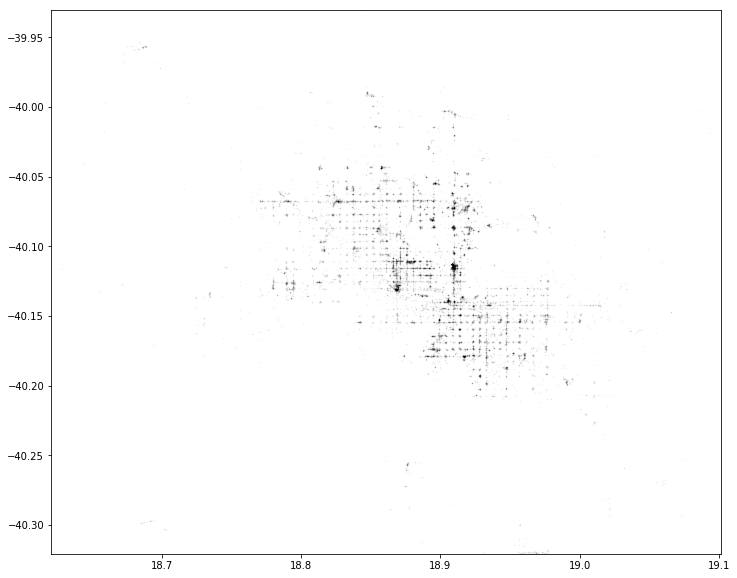

In [50]:
lng = q3.longitude
lat = q3.latitude

def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)


px, py = lat_lng_to_pixels(lat, lng)
px.min()
px.max()
py.min()
py.max()


plt.figure(figsize=(12, 10))
plt.axis('equal')
plt.xlim(18.628434722222224, 19.093456499999998)
plt.ylim(-40.320799566245469, -39.930537385207046)

plt.gca().set_facecolor('white')
plt.scatter(px, py, s=.4, alpha=.05, color='black')


F. How many unique categories can we find within the categories column inside this data frame?

In [42]:
s = set()

for i in range(0, len(yelpdf['categories'])):

    for item in yelpdf['categories'][i]:
        s.add(item)

len(s)

591

G. What is the most reviewed business with the “Pet” category (‘Bakeries’ category) in the city of Phoenix?

In [43]:
q7 = yelpdf
q7['categories'] = q7['categories'].apply(lambda x: ','.join(map(str, x)))

In [44]:
q7[(q7['city'] == 'Phoenix') & (q7['categories'].str.contains(r"\bBakeries\b", case = True))].groupby('name', as_index=False)[['review_count']].sum().max()

name            Willo Baking Company
review_count                     218
dtype: object

In [45]:
q7[(q7['city'] == 'Phoenix') & (q7['categories'].str.contains(r"\bPets\b", case = True))].groupby('name', as_index=False)[['review_count']].sum().max()

name            Your Dog Guru
review_count              102
dtype: object

In [46]:
q7[(q7['city'] == 'Phoenix') & (q7['categories'].str.contains(r"\bPet\b", case = True))].groupby('name', as_index=False)[['review_count']].sum().max()

name            Your Dog Guru
review_count              102
dtype: object

H. Create a data frame that counts the number of four-star-and-above businesses per city in your data frame

In [47]:
yelpdf[(yelpdf['stars'] >=4)].groupby('city', as_index=False)[['name']].count()

,city,name
0,Ahwatukee,4
1,Anthem,17
2,Apache Junction,37
3,Arcadia,1
4,Avondale,82
5,Buckeye,16
6,Carefree,19
7,Casa Grande,21
8,Cave Creek,71
9,Chandler,584
